# Predict Presidential election voting with two features you choose
* can use one from Bread & Peace
* new data for at least one feature

In [2]:
import pandas as pd

In [66]:
# import csv and get a sorted dataframe of unprovoked shark attacks per year in the USA

attacks = pd.read_csv('/Users/stephensinclair//Desktop/Unit2-Regression1/attacks.csv', 
                     encoding = 'ISO-8859-1')

In [67]:
attacks = attacks[(attacks['Country']=='USA') & (attacks['Type']=='Unprovoked')]
attacks['Year'] = attacks['Year'].astype(int)

In [68]:
attacks = pd.DataFrame(attacks['Year'].value_counts())
attacks = attacks.sort_index()
attacks = attacks[-72:]
attacks = attacks.reset_index()
attacks = attacks.rename({'index':'Year', 'Year':'Attacks'}, axis=1)

In [70]:
list = [1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016]
attacks = attacks[attacks['Year'].isin(list)]
attacks.head()

,Year,Attacks
5,1952,6
9,1956,6
13,1960,13
17,1964,6
21,1968,10


# Load Bread & Peace Data

In [37]:
import pandas as pd

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [38]:
columns = ['Year','Average Recent Growth in Personal Incomes']

data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

In [39]:
"""
Fatalities denotes the cumulative number of American military
fatalities per millions of US population the in Korea, Vietnam,
Iraq and Afghanistan wars during the presidential terms
preceding the 1952, 1964, 1968, 1976 and 2004, 2008 and
2012 elections.

http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf
"""

columns = ['Year','US Military Fatalities per Million']

data = [[1952,190],
        [1956,  0],
        [1960,  0],
        [1964,  1],
        [1968,146],
        [1972,  0],
        [1976,  2],
        [1980,  0],
        [1984,  0],
        [1988,  0],
        [1992,  0],
        [1996,  0],
        [2000,  0],
        [2004,  4],
        [2008, 14],
        [2012,  5], 
        [2016,  5]]
        
deaths = pd.DataFrame(data=data, columns=columns)

# Merge Data

In [71]:
df = votes.merge(growth).merge(attacks)
df.shape

(17, 6)

In [72]:
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,Attacks
0,1952,Stevenson,Eisenhower,44.60,2.40,6
1,1956,Eisenhower,Stevenson,57.76,2.89,6
2,1960,Nixon,Kennedy,49.91,0.85,13
3,1964,Johnson,Goldwater,61.34,4.21,6
4,1968,Humphrey,Nixon,49.60,3.02,10
5,1972,Nixon,McGovern,61.79,3.62,8
6,1976,Ford,Carter,48.95,1.08,17
7,1980,Carter,Reagan,44.70,-0.39,8
8,1984,Reagan,Mondale,59.17,3.86,16
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,23


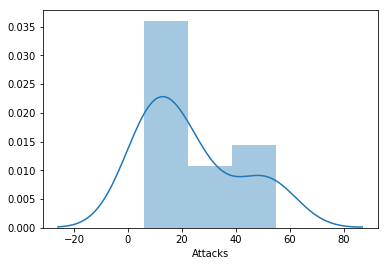

In [73]:
%matplotlib inline
import seaborn as sns
sns.distplot(df['Attacks'])

# Create model

In [74]:
# Choose class of model

from sklearn.linear_model import LinearRegression

In [75]:
# Choose hyperparamters by instantiating this class with desired values

model = LinearRegression()

In [76]:
# Arrange data into feature matrix and target vector

features = ['Average Recent Growth in Personal Incomes', 'Attacks']
target = 'Incumbent Party Vote Share'

X = df[features]
y = df[target]

X.shape, y.shape

((17, 2), (17,))

In [77]:
# Fit model to data by calling the fit() method of the model instance

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
# Apply model to data

y_pred = model.predict(X)

In [80]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_pred)

2.487028913342467

In [81]:
y_pred

array([53.21319581, 54.76010416, 48.53953555, 58.92728583, 55.29600627,
       57.12743083, 49.39113324, 44.46803803, 58.13609593, 53.33615743,
       47.21263863, 49.48447624, 54.3418961 , 51.8822019 , 47.33267382,
       50.17295857, 47.45817167])

In [82]:
y

0     44.60
1     57.76
2     49.91
3     61.34
4     49.60
5     61.79
6     48.95
7     44.70
8     59.17
9     53.94
10    46.55
11    54.74
12    50.27
13    51.24
14    46.32
15    52.00
16    48.20
Name: Incumbent Party Vote Share, dtype: float64

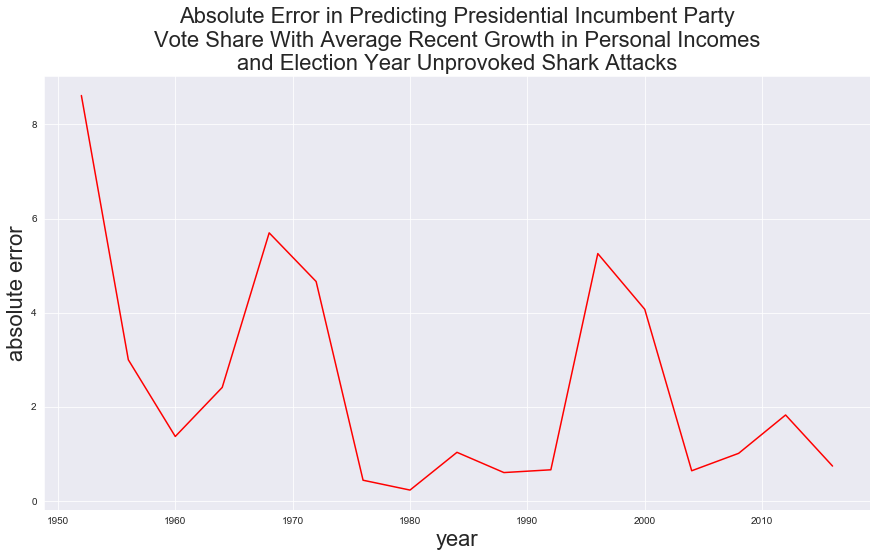

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

sns.set_style('darkgrid')


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(list, abs(y_pred-y), color='red')

title = ax.set_title("\n".join(wrap("Absolute Error in Predicting Presidential Incumbent Party Vote Share With Average Recent Growth in Personal Incomes and Election Year Unprovoked Shark Attacks", 60)), {'fontsize':22})

fig.tight_layout()
title.set_y(1.05)
fig.subplots_adjust(top=0.8)


plt.xlabel('year', fontsize=22)
plt.ylabel('absolute error', fontsize=22)

fig.savefig("shark.jpg")

In [108]:
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,Attacks
0,1952,Stevenson,Eisenhower,44.60,2.40,6
1,1956,Eisenhower,Stevenson,57.76,2.89,6
2,1960,Nixon,Kennedy,49.91,0.85,13
3,1964,Johnson,Goldwater,61.34,4.21,6
4,1968,Humphrey,Nixon,49.60,3.02,10
5,1972,Nixon,McGovern,61.79,3.62,8
6,1976,Ford,Carter,48.95,1.08,17
7,1980,Carter,Reagan,44.70,-0.39,8
8,1984,Reagan,Mondale,59.17,3.86,16
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,23


In [110]:
# Add a column to indicate if the incumbent party ran a sitting President

df['Sitting President'] = [0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0]
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,Attacks,Sitting President
0,1952,Stevenson,Eisenhower,44.60,2.40,6,0
1,1956,Eisenhower,Stevenson,57.76,2.89,6,1
2,1960,Nixon,Kennedy,49.91,0.85,13,0
3,1964,Johnson,Goldwater,61.34,4.21,6,1
4,1968,Humphrey,Nixon,49.60,3.02,10,0
5,1972,Nixon,McGovern,61.79,3.62,8,1
6,1976,Ford,Carter,48.95,1.08,17,0
7,1980,Carter,Reagan,44.70,-0.39,8,0
8,1984,Reagan,Mondale,59.17,3.86,16,1
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,23,0


In [111]:
model = LinearRegression()

In [112]:
features = ['Average Recent Growth in Personal Incomes', 'Sitting President']
target = 'Incumbent Party Vote Share'

X = df[features]
y = df[target]

In [113]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
y_pred = model.predict(X)

In [115]:
mean_absolute_error(y, y_pred)

1.7299537266972072

In [116]:
# Add feature that indicates whether incumbent party ran a sitting President, see if that improves the MAE of Bread & Peace
df2 = df.merge(deaths)

In [118]:
model = LinearRegression()

In [122]:
features = ['Average Recent Growth in Personal Incomes', 'Sitting President', 'US Military Fatalities per Million']
target = 'Incumbent Party Vote Share'

X = df2[features]
y = df2[target]

In [123]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [124]:
y_pred = model.predict(X)

In [125]:
mean_absolute_error(y, y_pred)

1.1403523988739077